In [3]:
from fully_random_binary_RB import FullyRandomBinaryRB_Experiment

from selene_sim import DepolarizingErrorModel, Stim
from selene_custom_error_model import (
    BasicErrorModel,
    OneQubitErrorRates,
    TwoQubitErrorRates,
)

In [10]:
# select parameters and build experiment

n_qubits = 98
n_meas_per_layer = [0, 6, 12]
seq_lengths = [4, 10, 16] # half of circuit depth
filename = 'exp_fully_random_binary_RB_example.py'

exp = FullyRandomBinaryRB_Experiment(n_qubits, seq_lengths, n_meas_per_layer=n_meas_per_layer, filename=filename)
exp.add_settings()

Having setup our binary RB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [11]:
# setup error model

error_model = DepolarizingErrorModel(
    #random_seed=1234,
    # single qubit gate error rate
    #p_1q=3e-5,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=1.5e-3,
    p_init=0,
)

In [12]:
# simulate experiment

shots = 4000
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/9 circuits complete
2/9 circuits complete
3/9 circuits complete
4/9 circuits complete
5/9 circuits complete
6/9 circuits complete
7/9 circuits complete
8/9 circuits complete
9/9 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [ ]:
# Choose domain and login to Nexus

import os
os.environ["NEXUS_DOMAIN"] = "qa.myqos.com"

import qnexus
qnexus.login()

In [ ]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='fully-random-binary_RB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E')

In [ ]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [ ]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

In [ ]:
# retrieve results

exp.retrieve(execute_job_ref)

### Analyze experimental results

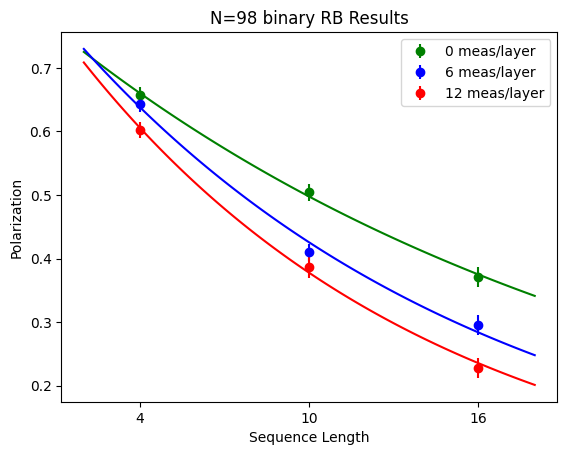

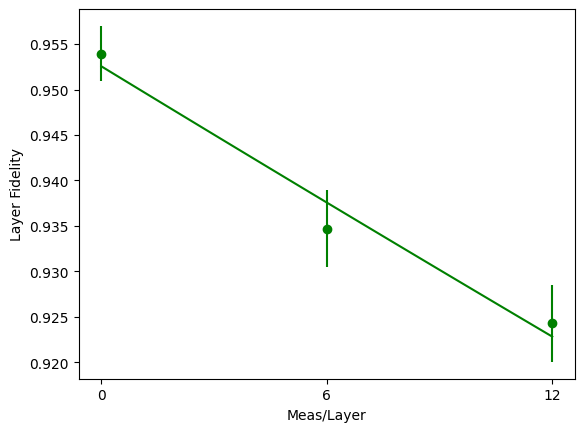

Max depth with success > 2/3
MCMR/layer = 0: 34
MCMR/layer = 6: 24
MCMR/layer = 12: 21
Effective TQ avg fidelity: 0.99923 +/- 5e-05
Effective MCMR error: 0.00176 +/- 0.00034


In [14]:
exp.analyze_results()

In [ ]:
# save experiment object to working directory

exp.save()